# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tf.__version__

'2.3.0'

# Creating dataset

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
# X : x, y coordinates of points
# y : labels (0, 1)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

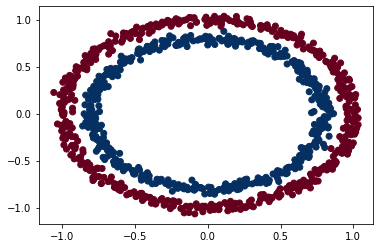

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

# Input, output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [11]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

# Creating the model

In [85]:
tf.random.set_seed(42)

In [86]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(2),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

In [87]:
classifier.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [88]:
# Learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [89]:
history = classifier.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

In [90]:
classifier.predict([[0, 0]])

array([[0.5086736]], dtype=float32)

In [91]:
classifier.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934711933135986, 0.4950000047683716]

In [92]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.694489,0.49875,0.000100
1,0.693771,0.49750,0.000112
2,0.693004,0.49625,0.000126
3,0.692244,0.49750,0.000141
4,0.691439,0.50625,0.000158
...,...,...,...
95,0.786596,0.47375,5.623413
96,0.807704,0.50125,6.309574
97,0.965056,0.49625,7.079458
98,0.972831,0.49125,7.943282


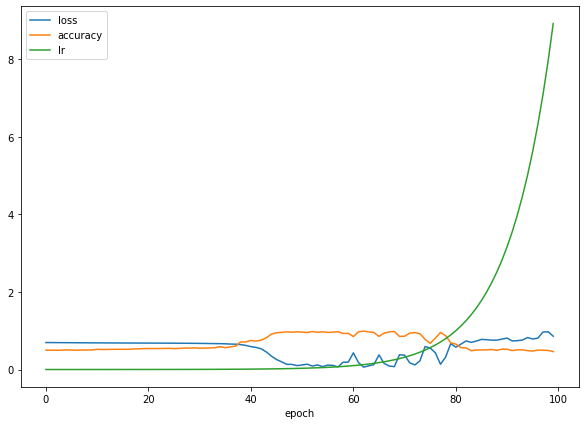

In [93]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epoch')
plt.show()

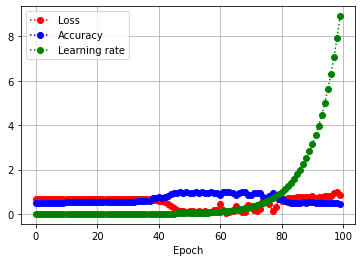

In [94]:
plt.plot(history.epoch, history.history['loss'], 'ro:', label='Loss')
plt.plot(history.epoch, history.history['accuracy'], 'bo:', label='Accuracy')
plt.plot(history.epoch, history.history['lr'], 'go:', label='Learning rate')
plt.grid()
plt.xlabel('Epoch')
plt.legend()
plt.show()

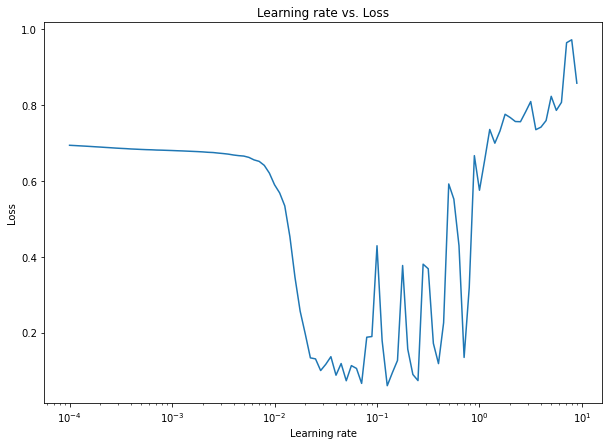

In [101]:
lrs =  1e-4 * 10**(tf.range(100)/20)

fig = plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')
plt.show()

In [102]:

# def plot_decision_boundary(model, X, y):
#     """
#     Plots the decision boundary created by a model predicting on X.
#     This function was inspired by two resources:
#     1. https://cs231n.github.io/neural-networks-case-study/
#     2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
#     """
    
#     steps = 100

#     # Define the axis boundaries of the plot and create a meshgrid
#     x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
#     y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
#                         np.linspace(y_min, y_max, steps))
    
#     # Create X value (we're going to make predictions on these)
#     x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

#     # Make predictions
#     y_pred = model.predict(x_in)

#     # Check for multi-class
#     if len(y_pred[0]) > 1:
#         print("doing multiclass classification")
#         # We have to reshape our prediction to get them ready for plotting
#         y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
#     else:
#         print("doing binary classification")
#         y_pred = np.round(y_pred).reshape(xx.shape)
    
#     # Plot the decision boundary
#     plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())

In [103]:
# fig = plt.figure(figsize=(15, 8))

# plt.subplot(1, 2, 1)
# plt.title('Training Data')
# plot_decision_boundary(classifier, X_train, y_train)

# plt.subplot(1, 2, 2)
# plt.title('Testing Data')
# plot_decision_boundary(classifier, X_test, y_test)

# plt.show()